In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [51]:
dataset = pd.read_csv('../data/HT_Sensor_dataset.dat',sep = '  ',header = None,engine='python')
dataset.columns = ['id','time','R1','R2','R3','R4','R5','R6','R7','R8','Temp.','Humidity']
dataset.set_index('id',inplace = True)
dataset.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [55]:
output = pd.read_csv('../data/HT_Sensor_metadata.csv',sep = '\t',header = None)
output.columns = ['id','date','class','t0','dt']
output.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


# Joining Dataset

We can see that the two dataset are for same experiment. So, we need to join the two datasets on id. 

In [57]:
dataset = dataset.join(output,how = 'inner')
dataset.set_index(np.arange(dataset.shape[0]),inplace = True)
dataset['time']  += dataset['t0']
dataset.drop(['t0'],axis = 1,inplace=True)
dataset.head()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,date,class,dt
0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,0,07-04-15,banana,1.64
1,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,0,07-04-15,banana,1.64
2,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,0,07-04-15,banana,1.64
3,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,0,07-04-15,banana,1.64
4,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,0,07-04-15,banana,1.64


Now, we are going to see the plots of reading of the sensors with time.  
The graph shown represent day 17 reading.  
As we can see from the graphs  sensor R7 shows minimum reading and sensor R1 has maximum reading.  
The readings for rest of the days will be similar to the readings of plots shown below if the temprature and humidity are similar.

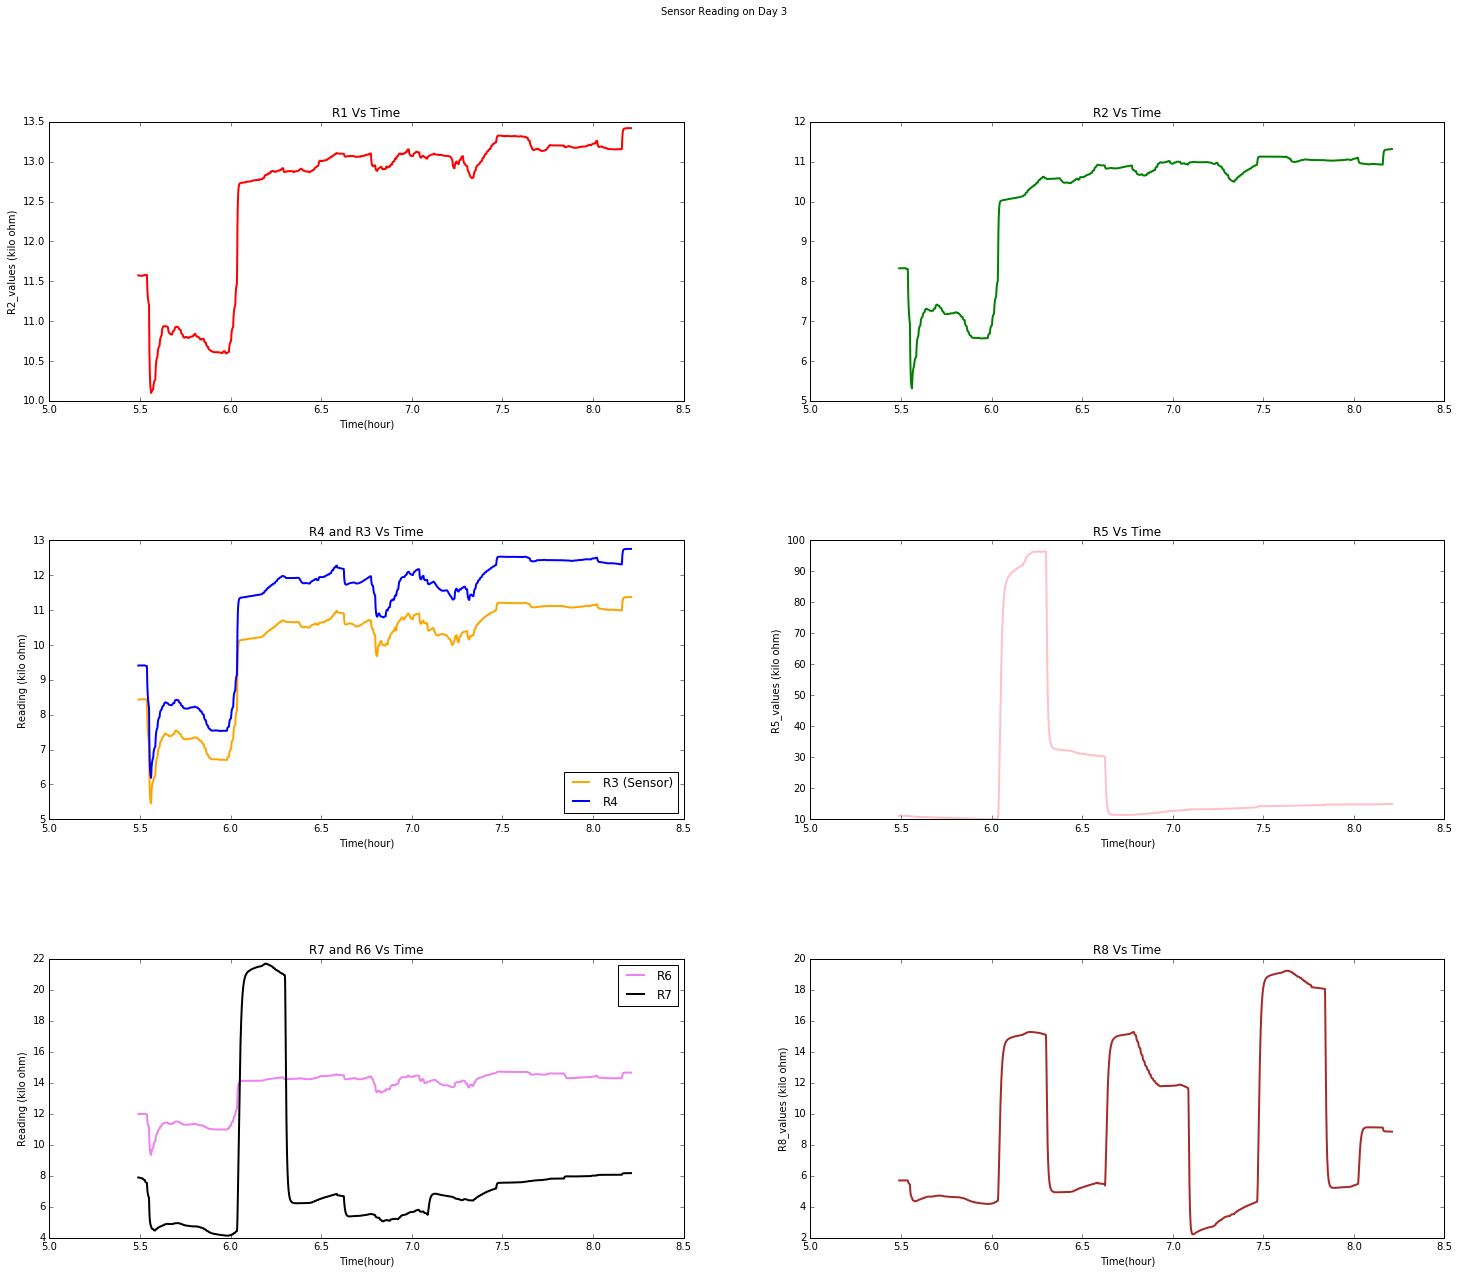

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)

axes[0,0].plot(dataset.time[dataset.id == 3],dataset.R1[dataset.id == 3],c = 'red',linewidth = '2.0')
axes[0,0].set_title('R1 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R1_values(kilo ohm)')

axes[0,1].plot(dataset.time[dataset.id == 3],dataset.R2[dataset.id == 3],c = 'green',linewidth = '2.0')
axes[0,1].set_title('R2 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R2_values (kilo ohm)')


axes[1,0].plot(dataset.time[dataset.id == 3],dataset.R3[dataset.id == 3],c = 'orange',linewidth = '2.0',label = 'R3 (Sensor)')
#axes[1,0].set_title('R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('R3_values (kilo ohm)')


axes[1,0].plot(dataset.time[dataset.id == 3],dataset.R4[dataset.id == 3],c = 'blue',linewidth = '2.0',label = 'R4')
axes[1,0].set_title('R4 and R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('Reading (kilo ohm)')
axes[1,0].legend(loc = 4)

axes[1,1].plot(dataset.time[dataset.id == 3],dataset.R5[dataset.id == 3],c = 'pink',linewidth = '2.0')
axes[1,1].set_title('R5 Vs Time')
axes[1,1].set_xlabel('Time(hour)')
axes[1,1].set_ylabel('R5_values (kilo ohm)')
 

axes[2,0].plot(dataset.time[dataset.id == 3],dataset.R6[dataset.id == 3],c = 'violet',linewidth = '2.0',label = 'R6')
#axes[2,0].set_title('R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('R6_values (kilo ohm)')


axes[2,0].plot(dataset.time[dataset.id == 3],dataset.R7[dataset.id == 3],c = 'black',linewidth = '2.0',label ='R7')
axes[2,0].set_title('R7 and R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('Reading (kilo ohm)')
axes[2,0].legend()

axes[2,1].plot(dataset.time[dataset.id == 3],dataset.R8[dataset.id == 3],c = 'brown',linewidth = '2.0')
axes[2,1].set_title('R8 Vs Time')
axes[2,1].set_xlabel('Time(hour)')
axes[2,1].set_ylabel('R8_values (kilo ohm)')
plt.suptitle('Sensor Reading on Day 3')
pl.savefig("../Graphs/Graph1.png", dpi=300)

Now, the above reading will be similar for all days if the Humidity and Temprature are similar.  
Let us plot the Humidity and Temprature vs Time.

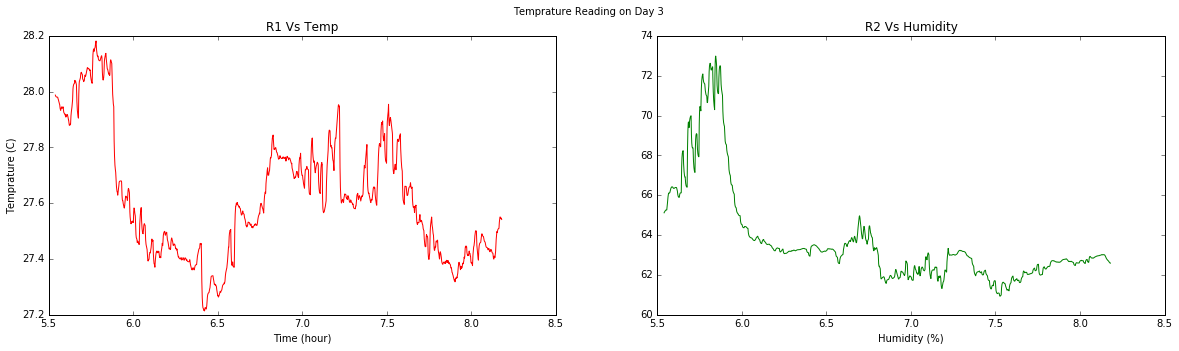

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=.5)

axes[0].plot(dataset.time[dataset.id == 17],dataset['Temp.'][dataset.id == 17],c = 'r')
axes[0].set_title('R1 Vs Temp')
axes[0].set_xlabel('Time (hour)')
axes[0].set_ylabel('Temprature (C)')
axes[1].plot(dataset.time[dataset.id == 17],dataset.Humidity[dataset.id == 17],c = 'green')
axes[1].set_title('R2 Vs Humidity')
axes[1].set_xlabel('Humidity (%)')
plt.suptitle('Temprature Reading on Day 3')
pl.savefig("../Graphs/Graph2.png", dpi=300)

In [7]:
dataset.corr()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,dt
time,1.000000,0.076205,0.149682,0.132345,0.168753,-0.093362,0.019509,0.037833,0.023120,-0.062172,-0.290118,0.101273,-0.007905
R1,0.076205,1.000000,0.829782,0.830017,0.815452,0.023163,0.179294,0.261193,0.210106,-0.061570,-0.197800,0.049594,-0.126976
R2,0.149682,0.829782,1.000000,0.904101,0.970727,0.000083,0.179965,0.251888,0.212323,-0.071798,-0.197358,0.118749,-0.153989
R3,0.132345,0.830017,0.904101,1.000000,0.938719,0.011904,0.230779,0.300779,0.247322,-0.005071,-0.164143,0.196694,-0.233878
R4,0.168753,0.815452,0.970727,0.938719,1.000000,-0.001982,0.201893,0.269640,0.222034,-0.054750,-0.211453,0.152847,-0.185378
R5,-0.093362,0.023163,0.000083,0.011904,-0.001982,1.000000,0.117357,0.184570,0.329771,-0.067408,0.001222,-0.061231,0.055052
R6,0.019509,0.179294,0.179965,0.230779,0.201893,0.117357,1.000000,0.232124,0.237968,-0.085537,-0.009581,0.334091,0.051988
R7,0.037833,0.261193,0.251888,0.300779,0.269640,0.184570,0.232124,1.000000,0.763631,-0.009134,-0.020658,0.098402,-0.141038
R8,0.023120,0.210106,0.212323,0.247322,0.222034,0.329771,0.237968,0.763631,1.000000,0.000779,0.016815,0.064075,-0.140854
Temp.,-0.062172,-0.061570,-0.071798,-0.005071,-0.054750,-0.067408,-0.085537,-0.009134,0.000779,1.000000,0.213209,0.223035,-0.263294


In [8]:
dataset.corr() > 0.98

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,dt
time,True,False,False,False,False,False,False,False,False,False,False,False,False
R1,False,True,False,False,False,False,False,False,False,False,False,False,False
R2,False,False,True,False,False,False,False,False,False,False,False,False,False
R3,False,False,False,True,False,False,False,False,False,False,False,False,False
R4,False,False,False,False,True,False,False,False,False,False,False,False,False
R5,False,False,False,False,False,True,False,False,False,False,False,False,False
R6,False,False,False,False,False,False,True,False,False,False,False,False,False
R7,False,False,False,False,False,False,False,True,False,False,False,False,False
R8,False,False,False,False,False,False,False,False,True,False,False,False,False
Temp.,False,False,False,False,False,False,False,False,False,True,False,False,False


In [17]:
xtrain_dataframe = pd.DataFrame(xtrain)
ytrain_dataframe = pd.DataFrame(ytrain)
xtest_dataframe = pd.DataFrame(xtest)
ytest_dataframe = pd.DataFrame(ytest)
xtrain_dataframe.columns = [u'R1',u'R2',u'R3',u'R4',u'R5',u'R6',u'R7',u'R8',u'Temp.',u'Humidity']
ytrain_dataframe.columns = ['class']
xtest_dataframe.columns = [u'R1',u'R2',u'R3',u'R4',u'R5',u'R6',u'R7',u'R8',u'Temp.',u'Humidity']
ytest_dataframe.columns = ['class']
res = sm.RLM(ytrain_dataframe, xtrain_dataframe).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  class   No. Observations:               210000
Model:                            RLM   Df Residuals:                   209990
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 24 Apr 2017                                         
Time:                        19:45:54                                         
No. Iterations:                    34                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
R1            -0.0013      0.002     -0.581      0.561        -0.006     0.003
R2             0.0768      0.003     26.993      0.000         0.071     0.082
R3            -0.1743      0.001   -119.915      0.000        -0.177    -0.171
R4             0.0767      0.003     29.652      0.000         0.072     0.082
R5             0.0011   5.62e-05     19.856      0.000         0.001     0.001
R6             0.0377      0.000    153.377      0.000         0.037     0.038
R7             0.0046      0.001      4.152      0.000         0.002     0.007
R8            -0.0359      0.001    -41.170      0.000        -0.038    -0.034
Temp.          0.0720      0.001     97.073      0.000         0.071     0.073
Humidity      -0.0129      0.000    -55.039      0.000        -0.013    -0.012
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis.

The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue. The evidence in the trial is your data and the statistics that go along with it. All hypothesis tests ultimately use a p-value to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1 and interpreted in the following way:

1. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

2. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

3. p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.


#### P value of R1 is too much which means that this variable donot have affect on the model. Hence we can remove this variable from our model.

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(dataset[[u'R2',u'R3',u'R4',u'R5',u'R6',u'R7',u'R8',u'Temp.',u'Humidity']].values,dataset['class'].values,train_size = 0.7)

In [9]:
for i in range(ytrain.shape[0]):
    if(ytrain[i] == 'background'):
        ytrain[i] = 0
    elif(ytrain[i] == 'banana'):
        ytrain[i] = 1
    else:
        ytrain[i] = 2
        
for i in range(ytest.shape[0]):
    if(ytest[i] == 'background'):
        ytest[i] = 0
    elif(ytest[i] == 'banana'):
        ytest[i] = 1
    else:
        ytest[i] = 2
        
ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')

# Logistic Regression

Logistic Regression is a method for classification. We need to classify between the Wine, Banana and background. Logistic regression is a Linear classifier.   
We need to regularize Logistic regression to prevent overfitting of the model.

## Cross Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

We did 11 fold cross validation

### Regularization

Regularization, in mathematics and statistics and particularly in the fields of machine learning and inverse problems, is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting.

In [46]:
from sklearn.cross_validation import KFold
Cs = [0.001,0.01,0.1,1,10,100]
count = 0
score_test = []
score_train = []
for c in Cs:
    score1 = []
    score2 = []
    est = LogisticRegression(C=c,n_jobs= 4)
    for itrain,itest in KFold(xtrain.shape[0],11):
        est.fit(xtrain[itrain],ytrain[itrain])
        score1.append(accuracy_score(est.predict(xtrain[itest]),ytrain[itest]))
        score2.append(accuracy_score(est.predict(xtrain[itrain]),ytrain[itrain]))
    score_test.append(np.mean(score1))
    score_train.append(np.mean(score2))

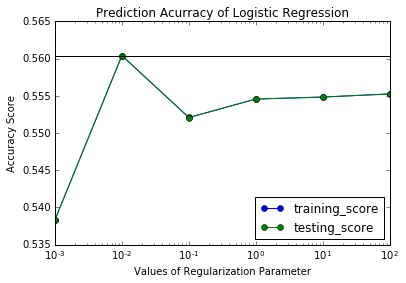

In [72]:
plt.plot([0.001,0.01,0.1,1,10,100],score_train,'o-',label = 'training_score')
plt.plot([0.001,0.01,0.1,1,10,100],score_test,'o-',label = 'testing_score')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel('Values of Regularization Parameter')
plt.ylabel('Accuracy Score')
plt.axhline(y=score_train[1],c = 'black')
plt.title('Prediction Acurracy of Logistic Regression')
pl.savefig("../Graphs/Graph3.png", dpi=300)

We can see that the accuracy of both training and testing set is good at Cs = 0.1

In [14]:
est = LogisticRegression(C = Cs[np.argmax(score)],n_jobs = 4)
est.fit(xtrain,ytrain)
ypred = est.predict(xtest)

In [15]:
confusion_matrix(ytest, ypred)

array([[13964,  2436],
       [ 6424,  7176]])

Acurracy :- 63%.  
From this graph we can see that the regularization is causing the model to underfit. It is because the model is not linearly seprable. So, we need to add feature to increase the accuracy of the model.

# Support Vector Machine

In [12]:
from sklearn.svm import SVC

C_2d_range = [1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain, ytrain)
        classifiers.append((C, gamma, clf))

hello


In [14]:
accuracy_score(clf.predict(xtest),ytest)

0.96186666666666665

As we can see the accuray is much high for training set. Let us check the accuracy of SVM for training set

In [16]:
accuracy_score(clf.predict(xtrain),ytrain)

0.96223333333333338

#### Hence we have approached our desired accuracy which is better than the paper we followed. 
Training Set Accuracy 96.22%.  
Testing Set Accuracy 96.18%

# We achieve more accuracy than the paper.